In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db=pd.read_csv("D:\Intellipaat\Python\Heart Attack Prediction\heart.csv")

In [3]:
db.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Checking dimension of dataframe

In [4]:
db.shape

(303, 14)

### Checking for null values

In [5]:
pd.isnull(db).sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

*No null values found*

In [6]:
db.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


*All attributes are of 'int' type except 'oldpeak' which is 'float' type*

### Checking for duplicated data

In [8]:
db[db.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
db.drop_duplicates(keep='first', inplace=True)

In [10]:
db.shape

(302, 14)

*Duplicate data has been removed*

In [11]:
db.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Data Visualization

In [12]:
db.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

#### Gender

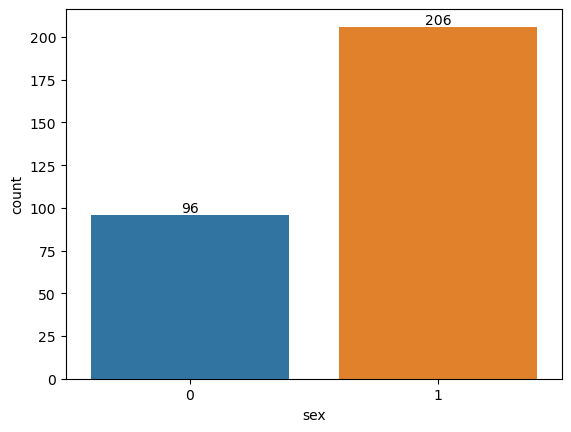

In [13]:
x=(db.sex.value_counts())

gd = sns.countplot(data=db, x="sex")
for bars in gd.containers:
    gd.bar_label(bars)

*Number of people having gender as 0 is 96 and the number of people having gender as 1 is 206*

#### Chest pain

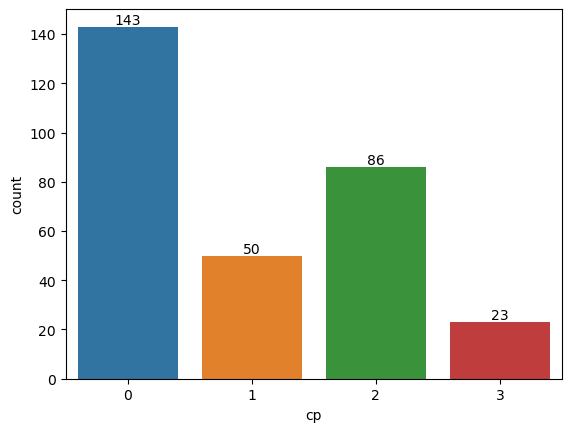

In [14]:
x=(db.cp.value_counts())

cpd= sns.countplot(data=db, x='cp')
for bars in cpd.containers:
    cpd.bar_label(bars)

*From the above graph, we can conclude that Category 0 has highest frequency with 143, category 1 has second-highest frequency with 86, category 2 has a frequency of 86 and category 3 has a frequency of 23.*

#### Fasting Blood Sugar

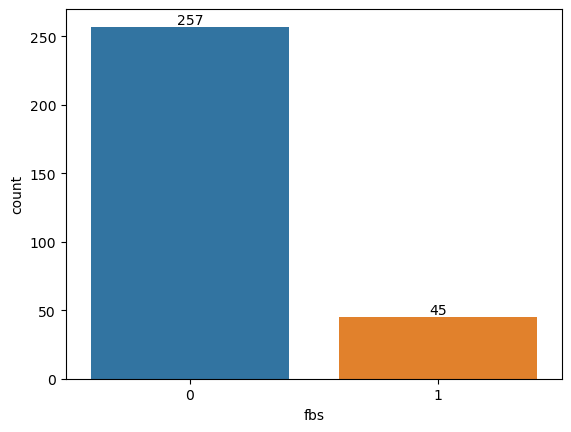

In [15]:
x=(db.fbs.value_counts())
fbsg= sns.countplot(data=db, x= 'fbs')
for bars in fbsg.containers:
    fbsg.bar_label(bars)

*FBS with value 0 is significantly higher than value 1.*

#### ECG

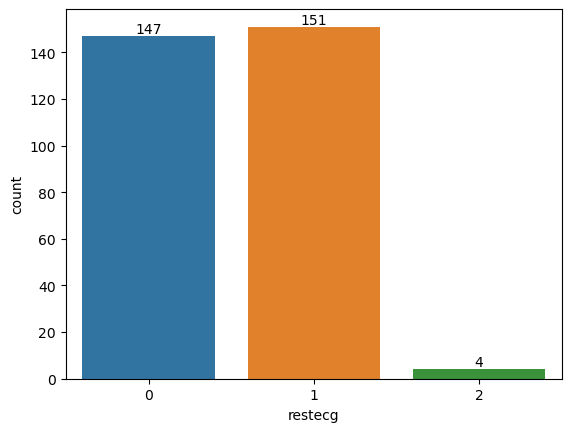

In [16]:
x=(db.restecg.value_counts())
ecg= sns.countplot(data=db, x='restecg')
for bars in ecg.containers:
    ecg.bar_label(bars)

*ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.*

#### Exercise Induced Angina

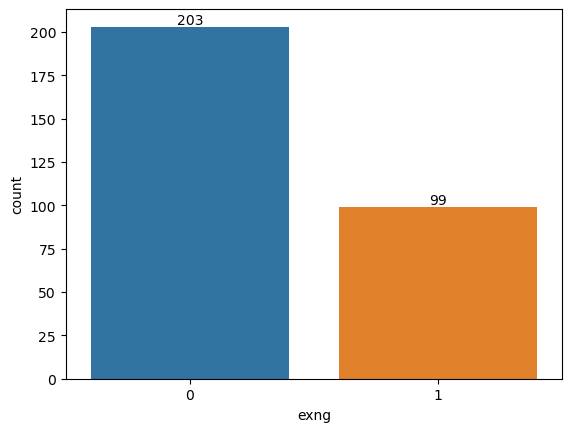

In [17]:
x=(db.exng.value_counts())
exngg=sns.countplot(data=db, x='exng')
for bars in exngg.containers:
    exngg.bar_label(bars)

*EXNG count in category 0 is more than double from category 1*

#### Thalium Stress Test

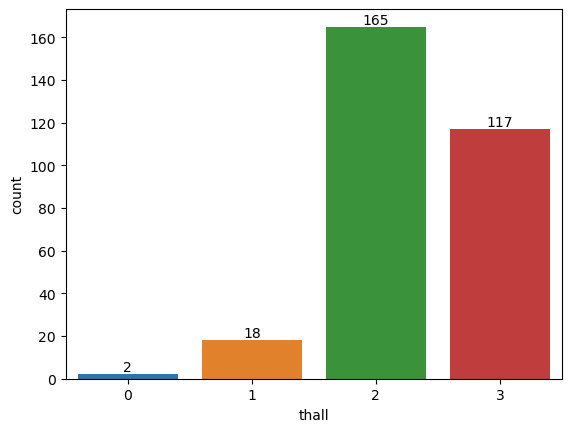

In [18]:
x=(db.thall.value_counts())
thallp=sns.countplot(data=db, x='thall')
for bars in thallp.containers:
    thallp.bar_label(bars)

*Thall count is maximum for category 2 and minimum for category 0*

### Density destribution based on age

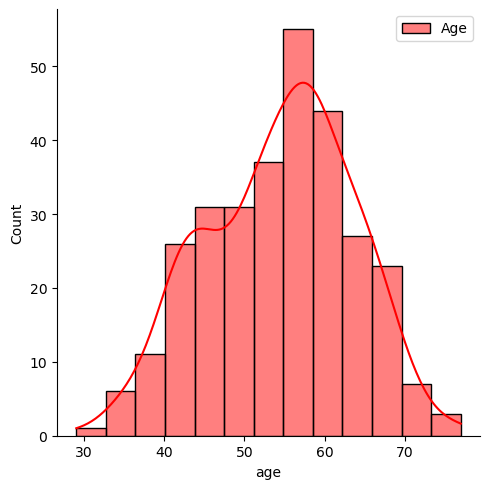

In [19]:
sns.displot(db.age, color="red", label="Age", kde= True)
plt.legend()

*From the above graph we can conclude that the density distribution is highest for the age group between 50-60*

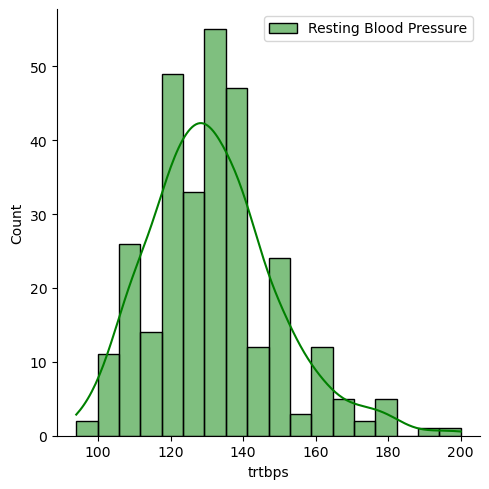

In [20]:
sns.displot(db.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

### Heart attack versus Age

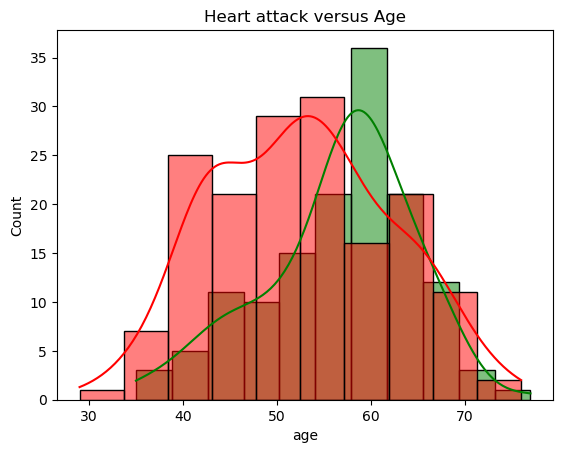

In [40]:
sns.histplot(db[db['output'] == 0]["age"], color='green',kde=True,) 
sns.histplot(db[db['output'] == 1]["age"], color='red',kde=True)
plt.title('Heart attack versus Age')
plt.show()

*From the above graph we can establish that there is a strong correlation between age and risk of heart attack.*

### Cholestrol versus Age

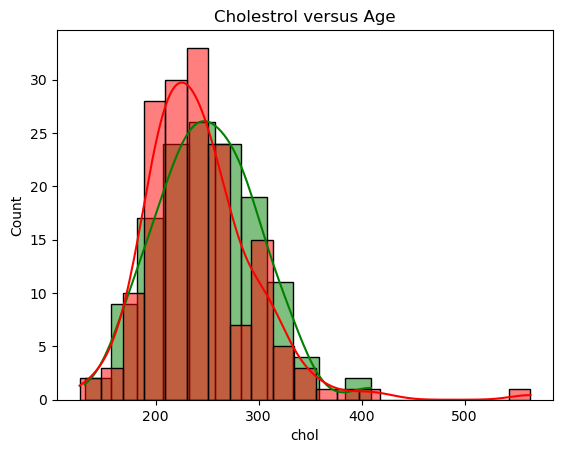

In [41]:
sns.histplot(db[db['output'] == 0]["chol"], color='green',kde=True,) 
sns.histplot(db[db['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

### Trtbs versus Age

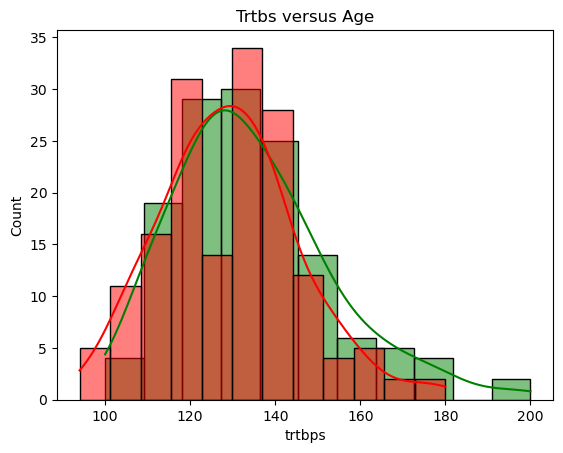

In [42]:
sns.histplot(db[db['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.histplot(db[db['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

### Thalachh versus Age

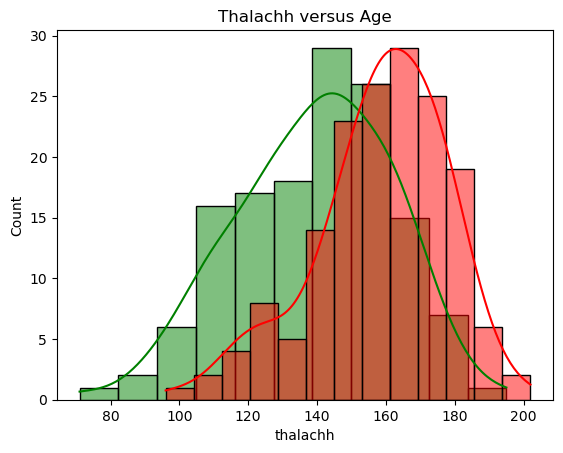

In [43]:
sns.histplot(db[db['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.histplot(db[db['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

*From the graph we can suggest that high maximum heart rate can lead to a heart attack*

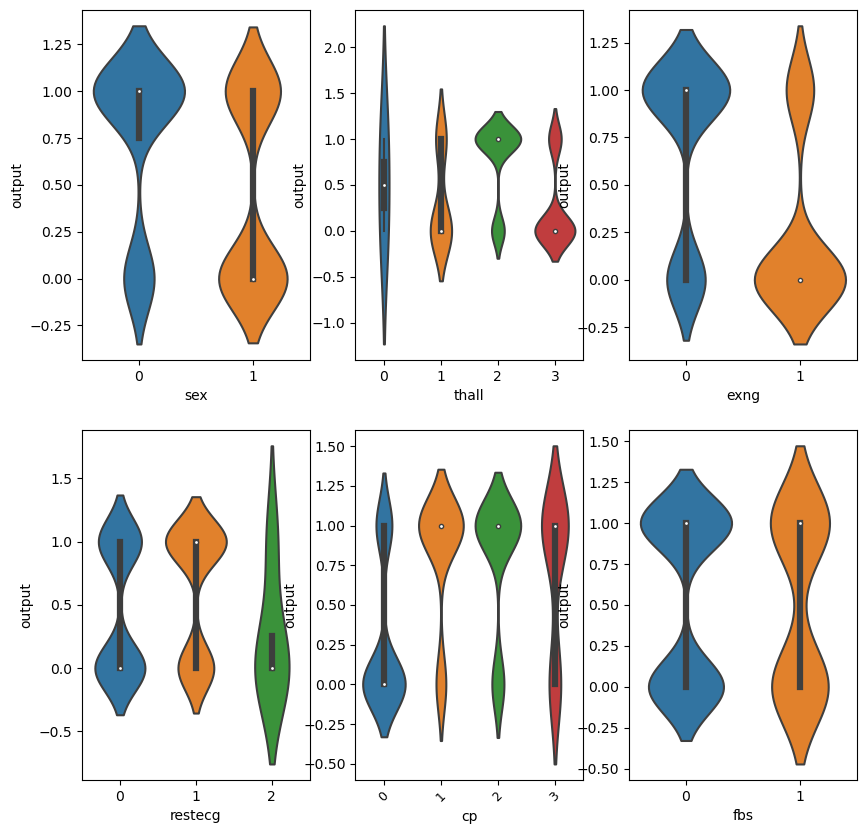

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data =db)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data =db)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data =db)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data =db)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data =db)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data =db)
plt.show()

### Data Preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [27]:
x = db.iloc[:, 1:-1].values
y = db.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

### Splitting the dataset into training and testing data

In [28]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

### Feature Scaling

In [29]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [30]:
x_train, x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

### Logistic Regression

In [31]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
predicted= lr.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print('Confusion Matrix: \n', conf)
print('Accuracy of the model is ', accuracy_score(y_test, predicted)*100,'%')

Confusion Matrix: 
 [[23  4]
 [ 3 31]]
Accuracy of the model is  88.52459016393442 %


### Gaussian Naive Bayes

In [32]:
gb= GaussianNB()
gb.fit(x_train, y_train)
predicted= gb.predict(x_test)
print("Accuracy of the model is ", accuracy_score(y_test, predicted)*100,"%")

Accuracy of the model is  88.52459016393442 %


### Bernoulli Naive Bayes

In [33]:
bnb= BernoulliNB()
bnb.fit(x_train, y_train)
predicted=bnb.predict(x_test)
print('Accuracy of the model is ', accuracy_score(y_test, predicted)*100, '%')

Accuracy of the model is  86.88524590163934 %


### Support Vector Machine

In [34]:
svm= SVC()
svm.fit(x_train, y_train)
predicted=svm.predict(x_test)
print('Accuracy of the model is ', accuracy_score(y_test, predicted)*100, '%')

Accuracy of the model is  91.80327868852459 %


### Random Forest

In [35]:
rf= RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predicted=rf.predict(x_test)
print('Accuracy of the model is', accuracy_score(y_test, predicted.round())*100, '%')

Accuracy of the model is 85.24590163934425 %


### KNN

In [36]:
kn= KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train, y_train)
predicted=kn.predict(x_test)
print('Confusion Matrix \n', confusion_matrix(y_test, predicted))
print('Accuracy of the model is ', accuracy_score(y_test, predicted)*100,'%')

Confusion Matrix 
 [[23  4]
 [ 6 28]]
Accuracy of the model is  83.60655737704919 %


C:\Users\Tapas Gope\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### XGBoost

In [37]:
xg= xgb.XGBClassifier(use_label_encoder=False)
xg.fit(x_train, y_train)
predicted=xg.predict(x_test)
print('Confusion Matrix \n', confusion_matrix(y_test, predicted))
print('Accuracy of the models is ', accuracy_score(y_test, predicted)*100, '%')

Confusion Matrix 
 [[22  5]
 [ 6 28]]
Accuracy of the models is  81.9672131147541 %


## Conclusion

*The Support Vector Machine(SVM) works best with the given dataset with the accuracy score of 91.8%*